In [0]:
#List the available files
dbutils.fs.ls("/FileStore/tables/")

Out[25]: [FileInfo(path='dbfs:/FileStore/tables/BDA_T_data_C1.csv', name='BDA_T_data_C1.csv', size=789833, modificationTime=1680487516000),
 FileInfo(path='dbfs:/FileStore/tables/BDA_T_data_C2.csv', name='BDA_T_data_C2.csv', size=526595, modificationTime=1680487517000),
 FileInfo(path='dbfs:/FileStore/tables/BDA_T_data_C3.csv', name='BDA_T_data_C3.csv', size=861797, modificationTime=1680487517000),
 FileInfo(path='dbfs:/FileStore/tables/Telco_data-1.csv', name='Telco_data-1.csv', size=977501, modificationTime=1679414606000),
 FileInfo(path='dbfs:/FileStore/tables/Telco_data.csv', name='Telco_data.csv', size=977501, modificationTime=1679283293000)]

In [0]:
#Rename 3 different dataset
#Rename the dataset 1
dbutils.fs.mv("FileStore/tables/T_Data_C1.csv","FileStore/tables/BDA_T_data_C1.csv")
#Rename the dataset 2
dbutils.fs.mv("FileStore/tables/T_Data_C2.csv","FileStore/tables/BDA_T_data_C2.csv")
#Rename the dataset 3
dbutils.fs.mv("FileStore/tables/T_Data_C3.csv","FileStore/tables/BDA_T_data_C3.csv")

---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
<command-3227918764212671> in <cell line: 3>()
      1 #Rename 3 different dataset
      2 #Rename the dataset 1
----> 3 dbutils.fs.mv("FileStore/tables/T_Data_C1.csv","FileStore/tables/BDA_T_data_C1.csv")
      4 #Rename the dataset 2
      5 dbutils.fs.mv("FileStore/tables/T_Data_C2.csv","FileStore/tables/BDA_T_data_C2.csv")

/databricks/python_shell/dbruntime/dbutils.py in f_with_exception_handling(*args, **kwargs)
    360                     exc.__context__ = None
    361                     exc.__cause__ = None
--> 362                     raise exc
    363 
    364             return f_with_exception_handling

ExecutionError: An error occurred while calling o377.mv.
: java.io.FileNotFoundException: /FileStore/tables/T_Data_C1.csv
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:121)
	at com.databricks

In [0]:
#Check for file changes
dbutils.fs.ls("/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/BDA_T_data_C1.csv', name='BDA_T_data_C1.csv', size=789833, modificationTime=1680487516000),
 FileInfo(path='dbfs:/FileStore/tables/BDA_T_data_C2.csv', name='BDA_T_data_C2.csv', size=526595, modificationTime=1680487517000),
 FileInfo(path='dbfs:/FileStore/tables/BDA_T_data_C3.csv', name='BDA_T_data_C3.csv', size=861797, modificationTime=1680487517000),
 FileInfo(path='dbfs:/FileStore/tables/Telco_data-1.csv', name='Telco_data-1.csv', size=977501, modificationTime=1679414606000),
 FileInfo(path='dbfs:/FileStore/tables/Telco_data.csv', name='Telco_data.csv', size=977501, modificationTime=1679283293000)]

In [0]:
# File location
file_locations = [
    "/FileStore/tables/BDA_T_data_C1.csv",
    "/FileStore/tables/BDA_T_data_C2.csv",
    "/FileStore/tables/BDA_T_data_C3.csv"
]


# File type and option
file_type = "csv"
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

dataframes = []
# The applied options are for CSV files. For other file types, these will be ignored.
for index,file in enumerate(file_locations):
    df = spark.read.format(file_type) \
      .option("inferSchema", infer_schema) \
      .option("header", first_row_is_header) \
      .option("sep", delimiter) \
      .load(file)
    
    dataframes.append(df)

dataframes[0] = dataframes[0].toDF(*dataframes[1].columns)
for df in dataframes:
    
    display(df)
    # Create a view or table
    temp_table_name = f"my_assignment_telco{index+1}"
    df.createOrReplaceTempView(temp_table_name)
    
    #create permanent table from the temp view to allow access across cluster
    permanent_table_name = f"my_assignment_telco{index+1}"
    #df.write.format("parquet").saveAsTable(permanent_table_name)

customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn 7590-VHVEG Female 0 Yes No 1 No No phone service DSL No Yes No No No No Month-to-month Yes Electronic check 29.85 29.85 No 5575-GNVDE Male 0 No No 34 Yes No DSL Yes No Yes No No No One year No Mailed check 56.95 1889.5 No 3668-QPYBK Male 0 No No 2 Yes No DSL Yes Yes No No No No Month-to-month Yes Mailed check 53.85 108.15 Yes 7795-CFOCW Male 0 No No 45 No No phone service DSL Yes No Yes Yes No No One year No Bank transfer (automatic) 42.3 1840.75 No 9237-HQITU Female 0 No No 2 Yes No Fiber optic No No No No No No Month-to-month Yes Electronic check 70.7 151.65 Yes 9305-CDSKC Female 0 No No 8 Yes Yes Fiber optic No No Yes No Yes Yes Month-to-month Yes Electronic check 99.65 820.5 Yes 1452-KIOVK Male 0 No Yes 22 Yes Yes Fiber optic No Yes No No Yes No Month-to-month Yes Credit card (automatic) 89.1 1949.4 No 6713-OKOMC Female 0 No No 10 No No phone service DSL Yes No No No No No Month-to-month No Mailed check 29.75 301.9 No 7892-POOKP Female 0 Yes No 28 Yes Yes Fiber optic No No Yes Yes Yes Yes Month-to-month Yes Electronic check 104.8 3046.05 Yes 6388-TABGU Male 0 No Yes 62 Yes No DSL Yes Yes No No No No One year No Bank transfer (automatic) 56.15 3487.95 No 9763-GRSKD Male 0 Yes Yes 13 Yes No DSL Yes No No No No No Month-to-month Yes Mailed check 49.95 587.45 No 7469-LKBCI Male 0 No No 16 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Two year No Credit card (automatic) 18.95 326.8 No 8091-TTVAX Male 0 Yes No 58 Yes Yes Fiber optic No No Yes No Yes Yes One year No Credit card (automatic) 100.35 5681.1 No 0280-XJGEX Male 0 No No 49 Yes Yes Fiber optic No Yes Yes No Yes Yes Month-to-month Yes Bank transfer (automatic) 103.7 5036.3 Yes 5129-JLPIS Male 0 No No 25 Yes No Fiber optic Yes No Yes Yes Yes Yes Month-to-month Yes Electronic check 105.5 2686.05 No 3655-SNQYZ Female 0 Yes Yes 69 Yes Yes Fiber optic Yes Yes Yes Yes Yes Yes Two year No Credit card (automatic) 113.25 7895.15 No 8191-XWSZG Female 0 No No 52 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Mailed check 20.65 1022.95 No 9959-WOFKT Male 0 No Yes 71 Yes Yes Fiber optic Yes No Yes No Yes Yes Two year No Bank transfer (automatic) 106.7 7382.25 No 4190-MFLUW Female 0 Yes Yes 10 Yes No DSL No No Yes Yes No No Month-to-month No Credit card (automatic) 55.2 528.35 Yes 4183-MYFRB Female 0 No No 21 Yes No Fiber optic No Yes Yes No No Yes Month-to-month Yes Electronic check 90.05 1862.9 No 8779-QRDMV Male 1 No No 1 No No phone service DSL No No Yes No No Yes Month-to-month Yes Electronic check 39.65 39.65 Yes 1680-VDCWW Male 0 Yes No 12 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Bank transfer (automatic) 19.8 202.25 No 1066-JKSGK Male 0 No No 1 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Month-to-month No Mailed check 20.15 20.15 Yes 3638-WEABW Female 0 Yes No 58 Yes Yes DSL No Yes No Yes No No Two year Yes Credit card (automatic) 59.9 3505.1 No 6322-HRPFA Male 0 Yes Yes 49 Yes No DSL Yes Yes No Yes No No Month-to-month No Credit card (automatic) 59.6 2970.3 No 6865-JZNKO Female 0 No No 30 Yes No DSL Yes Yes No No No No Month-to-month Yes Bank transfer (automatic) 55.3 1530.6 No 6467-CHFZW Male 0 Yes Yes 47 Yes Yes Fiber optic No Yes No No Yes Yes Month-to-month Yes Electronic check 99.35 4749.15 Yes 8665-UTDHZ Male 0 Yes Yes 1 No No phone service DSL No Yes No No No No Month-to-month No Electronic check 30.2 30.2 Yes 5248-YGIJN Male 0 Yes No 72 Yes Yes DSL Yes Ye

customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn 3097-PYWXL Female 0 Yes Yes 4 0 0 0 NAN NAN NAN NAN NAN NAN Month-to-month Yes Electronic check 19.95 82.9 0 2266-SJNAT Female 0 Yes 0 72 0 Yes Fiber optic 0 Yes Yes Yes Yes Yes One year 0 Credit card (automatic) 109.15 7789.6 0 0869-PAPRP Female 1 Yes 0 26 0 0 Fiber optic 0 0 Yes 0 Yes 0 Month-to-month Yes Credit card (automatic) 85.7 2067 0 4238-JSSWH Female 1 Yes 0 35 0 Yes Fiber optic 0 0 Yes 0 Yes Yes Month-to-month 0 Bank transfer (automatic) 102.05 3452.55 0 2972-YDYUW Female 0 0 0 57 0 Yes Fiber optic 0 Yes 0 Yes 0 Yes One year 0 Electronic check 94.7 5468.95 0 1104-FEJAM Male 0 Yes Yes 28 0 Yes DSL 0 Yes 0 0 0 Yes Month-to-month 0 Electronic check 64.4 1802.15 0 2809-ILCYT Female 0 Yes 0 25 0 Yes 0 NAN NAN NAN NAN NAN NAN One year Yes Mailed check 26.8 733.55 0 5499-ECUTN Female 0 Yes 0 47 0 0 DSL Yes 0 Yes 0 Yes 0 One year Yes Credit card (automatic) 66.05 3021.45 0 4981-FLTMF Female 0 Yes Yes 57 0 Yes DSL Yes Yes 0 Yes 0 0 Month-to-month 0 Bank transfer (automatic) 65.2 3687.85 0 9121-PHQSR Male 1 Yes 0 16 0 Yes Fiber optic 0 0 0 0 Yes 0 Month-to-month Yes Credit card (automatic) 85.05 1391.15 0 3113-IWHLC Male 0 0 0 5 0 0 DSL Yes 0 Yes 0 0 0 Month-to-month Yes Mailed check 55.8 274.35 0 3211-ILJTT Male 0 Yes 0 17 0 0 Fiber optic 0 0 0 0 0 0 Month-to-month Yes Bank transfer (automatic) 70.4 1214.05 Yes 4612-THJBS Female 1 0 0 56 0 Yes Fiber optic 0 Yes Yes 0 Yes Yes One year Yes Bank transfer (automatic) 104.75 5510.65 Yes 4277-BWBML Male 0 Yes Yes 72 0 0 0 NAN NAN NAN NAN NAN NAN Two year 0 Bank transfer (automatic) 19.95 1322.85 0 4094-NSEDU Female 1 0 0 21 0 Yes Fiber optic 0 0 0 0 Yes Yes Month-to-month Yes Electronic check 94.25 1973.75 Yes 0234-TEVTT Female 0 Yes Yes 48 0 0phone service DSL Yes 0 Yes 0 0 Yes One year 0 Credit card (automatic) 45.0 2196.3 0 4304-TSPVK Female 0 Yes 0 68 0 Yes Fiber optic Yes Yes Yes Yes Yes Yes Two year 0 Bank transfer (automatic) 114.9 7843.55 0 1552-AAGRX Female 0 0 0 30 0 Yes Fiber optic Yes 0 0 Yes Yes Yes Month-to-month 0 Bank transfer (automatic) 106.4 3211.9 0 2637-FKFSY Female 0 Yes 0 3 0 0 DSL 0 0 0 0 0 0 Month-to-month Yes Mailed check 46.1 130.15 0 9796-MVYXX Female 1 0 0 14 0 0phone service DSL Yes 0 Yes Yes 0 0 Two year 0 Mailed check 39.7 692.35 0 7874-ECPQJ Female 0 0 Yes 4 0 0 0 NAN NAN NAN NAN NAN NAN Month-to-month Yes Bank transfer (automatic) 20.05 85.5 0 0020-INWCK Female 0 Yes Yes 71 0 Yes Fiber optic 0 Yes Yes 0 0 Yes Two year Yes Credit card (automatic) 95.75 6849.4 0 7089-RKVSZ Male 0 Yes Yes 8 0 Yes 0 NAN NAN NAN NAN NAN NAN One year 0 Mailed check 24.4 203.95 0 2683-JXWQQ Male 0 Yes Yes 61 0 0phone service DSL Yes 0 Yes 0 0 0 Month-to-month 0 Bank transfer (automatic) 33.6 2117.2 0 9548-ZMVTX Male 0 Yes Yes 72 0 Yes Fiber optic 0 Yes Yes Yes 0 0 Two year 0 Bank transfer (automatic) 90.45 6565.85 0 8739-XNIKG Female 0 0 0 5 0 Yes Fiber optic 0 0 0 0 Yes 0 Month-to-month Yes Electronic check 84.0 424.75 0 9755-JHNMN Female 0 0 0 49 0 0 DSL Yes Yes Yes Yes 0 0 Two year 0 Bank transfer (automatic) 67.4 3306.85 0 3981-QSVQI Male 0 0 0 8 0 0 0 NAN NAN NAN NAN NAN NAN Month-to-month Yes Bank transfer (automatic) 19.7 168.9 0 2789-HQBOU Male 0 0 0 3 0 0 Fiber optic 0 0 0 0 0 Yes Month-to-month Yes Electronic check 80.35 253.8 0 9424-CMPOG Male 0 Yes Yes 9 0 0 0 NAN NAN NAN NAN NAN NAN Two year 0 Mailed check 19.6 197.4 0 5067-WJEUN Male 0 Yes Yes 67 0 0 DSL Yes Yes 0 0 0 0 Two year Yes Bank transfer (automatic) 54.2 3838.2 0 3450-WXOAT Male 0 0 0 46 0 0 DSL 0 0 0 0 0 0 Month-to-month Yes Credit card (automatic) 45.2 2065.15 0 9251-WNSOD Female 0 Yes 0 67 0 Yes DSL Yes Yes Yes 0 0 Yes One year 0 Mailed check 75.1 5064.45 0 6974-DAFLI Female 0 Yes 0 55 0 0 0 NAN NAN NAN NAN NAN NAN One year 0 Electronic che

customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn 7590-VHVEG Female 0 Yes No 1 No No phone service DSL No Yes No No No No Month-to-month Yes Electronic check 29.85 29.85 No 5575-GNVDE Male 0 No No 34 Yes No DSL Yes No Yes No No No One year No Mailed check 56.95 1889.5 No 3668-QPYBK Male 0 No No 2 Yes No DSL Yes Yes No No No No Month-to-month Yes Mailed check 53.85 108.15 Yes 7795-CFOCW Male 0 No No 45 No No phone service DSL Yes No Yes Yes No No One year No Bank transfer (automatic) 42.3 1840.75 No 9237-HQITU Female 0 No No 2 Yes No Fiber optic No No No No No No Month-to-month Yes Electronic check 70.7 151.65 Yes 9305-CDSKC Female 0 No No 8 Yes Yes Fiber optic No No Yes No Yes Yes Month-to-month Yes Electronic check 99.65 820.5 Yes 1452-KIOVK Male 0 No Yes 22 Yes Yes Fiber optic No Yes No No Yes No Month-to-month Yes Credit card (automatic) 89.1 1949.4 No 6713-OKOMC Female 0 No No 10 No No phone service DSL Yes No No No No No Month-to-month No Mailed check 29.75 301.9 No 7892-POOKP Female 0 Yes No 28 Yes Yes Fiber optic No No Yes Yes Yes Yes Month-to-month Yes Electronic check 104.8 3046.05 Yes 6388-TABGU Male 0 No Yes 62 Yes No DSL Yes Yes No No No No One year No Bank transfer (automatic) 56.15 3487.95 No 9763-GRSKD Male 0 Yes Yes 13 Yes No DSL Yes No No No No No Month-to-month Yes Mailed check 49.95 587.45 No 7469-LKBCI Male 0 No No 16 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Two year No Credit card (automatic) 18.95 326.8 No 8091-TTVAX Male 0 Yes No 58 Yes Yes Fiber optic No No Yes No Yes Yes One year No Credit card (automatic) 100.35 5681.1 No 0280-XJGEX Male 0 No No 49 Yes Yes Fiber optic No Yes Yes No Yes Yes Month-to-month Yes Bank transfer (automatic) 103.7 5036.3 Yes 5129-JLPIS Male 0 No No 25 Yes No Fiber optic Yes No Yes Yes Yes Yes Month-to-month Yes Electronic check 105.5 2686.05 No 3655-SNQYZ Female 0 Yes Yes 69 Yes Yes Fiber optic Yes Yes Yes Yes Yes Yes Two year No Credit card (automatic) 113.25 7895.15 No 8191-XWSZG Female 0 No No 52 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Mailed check 20.65 1022.95 No 9959-WOFKT Male 0 No Yes 71 Yes Yes Fiber optic Yes No Yes No Yes Yes Two year No Bank transfer (automatic) 106.7 7382.25 No 4190-MFLUW Female 0 Yes Yes 10 Yes No DSL No No Yes Yes No No Month-to-month No Credit card (automatic) 55.2 528.35 Yes 4183-MYFRB Female 0 No No 21 Yes No Fiber optic No Yes Yes No No Yes Month-to-month Yes Electronic check 90.05 1862.9 No 8779-QRDMV Male 1 No No 1 No No phone service DSL No No Yes No No Yes Month-to-month Yes Electronic check 39.65 39.65 Yes 1680-VDCWW Male 0 Yes No 12 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Bank transfer (automatic) 19.8 202.25 No 1066-JKSGK Male 0 No No 1 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Month-to-month No Mailed check 20.15 20.15 Yes 3638-WEABW Female 0 Yes No 58 Yes Yes DSL No Yes No Yes No No Two year Yes Credit card (automatic) 59.9 3505.1 No 6322-HRPFA Male 0 Yes Yes 49 Yes No DSL Yes Yes No Yes No No Month-to-month No Credit card (automatic) 59.6 2970.3 No 6865-JZNKO Female 0 No No 30 Yes No DSL Yes Yes No No No No Month-to-month Yes Bank transfer (automatic) 55.3 1530.6 No 6467-CHFZW Male 0 Yes Yes 47 Yes Yes Fiber optic No Yes No No Yes Yes Month-to-month Yes Electronic check 99.35 4749.15 Yes 8665-UTDHZ Male 0 Yes Yes 1 No No phone service DSL No Yes No No No No Month-to-month No Electronic check 30.2 30.2 Yes 5248-YGIJN Male 0 Yes No 72 Yes Yes DSL Yes Ye

In [0]:
# Alvin
# --------------------
# check datatypes
for df in dataframes:
    df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = tr

In [0]:
#check dimension
for index, df in enumerate(dataframes):
    print(f"PySpark dataframe for dataset {index}:\nNo. of Columns: {len(df.columns)} \nNo. of Rows: {df.count()}")

PySpark dataframe for dataset 0:
No. of Columns: 21 
No. of Rows: 5686
PySpark dataframe for dataset 1:
No. of Columns: 21 
No. of Rows: 4718
PySpark dataframe for dataset 2:
No. of Columns: 21 
No. of Rows: 6274


In [0]:
#display dataframe
for df in dataframes:
    df.display()

customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn 7590-VHVEG Female 0 Yes No 1 No No phone service DSL No Yes No No No No Month-to-month Yes Electronic check 29.85 29.85 No 5575-GNVDE Male 0 No No 34 Yes No DSL Yes No Yes No No No One year No Mailed check 56.95 1889.5 No 3668-QPYBK Male 0 No No 2 Yes No DSL Yes Yes No No No No Month-to-month Yes Mailed check 53.85 108.15 Yes 7795-CFOCW Male 0 No No 45 No No phone service DSL Yes No Yes Yes No No One year No Bank transfer (automatic) 42.3 1840.75 No 9237-HQITU Female 0 No No 2 Yes No Fiber optic No No No No No No Month-to-month Yes Electronic check 70.7 151.65 Yes 9305-CDSKC Female 0 No No 8 Yes Yes Fiber optic No No Yes No Yes Yes Month-to-month Yes Electronic check 99.65 820.5 Yes 1452-KIOVK Male 0 No Yes 22 Yes Yes Fiber optic No Yes No No Yes No Month-to-month Yes Credit card (automatic) 89.1 1949.4 No 6713-OKOMC Female 0 No No 10 No No phone service DSL Yes No No No No No Month-to-month No Mailed check 29.75 301.9 No 7892-POOKP Female 0 Yes No 28 Yes Yes Fiber optic No No Yes Yes Yes Yes Month-to-month Yes Electronic check 104.8 3046.05 Yes 6388-TABGU Male 0 No Yes 62 Yes No DSL Yes Yes No No No No One year No Bank transfer (automatic) 56.15 3487.95 No 9763-GRSKD Male 0 Yes Yes 13 Yes No DSL Yes No No No No No Month-to-month Yes Mailed check 49.95 587.45 No 7469-LKBCI Male 0 No No 16 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Two year No Credit card (automatic) 18.95 326.8 No 8091-TTVAX Male 0 Yes No 58 Yes Yes Fiber optic No No Yes No Yes Yes One year No Credit card (automatic) 100.35 5681.1 No 0280-XJGEX Male 0 No No 49 Yes Yes Fiber optic No Yes Yes No Yes Yes Month-to-month Yes Bank transfer (automatic) 103.7 5036.3 Yes 5129-JLPIS Male 0 No No 25 Yes No Fiber optic Yes No Yes Yes Yes Yes Month-to-month Yes Electronic check 105.5 2686.05 No 3655-SNQYZ Female 0 Yes Yes 69 Yes Yes Fiber optic Yes Yes Yes Yes Yes Yes Two year No Credit card (automatic) 113.25 7895.15 No 8191-XWSZG Female 0 No No 52 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Mailed check 20.65 1022.95 No 9959-WOFKT Male 0 No Yes 71 Yes Yes Fiber optic Yes No Yes No Yes Yes Two year No Bank transfer (automatic) 106.7 7382.25 No 4190-MFLUW Female 0 Yes Yes 10 Yes No DSL No No Yes Yes No No Month-to-month No Credit card (automatic) 55.2 528.35 Yes 4183-MYFRB Female 0 No No 21 Yes No Fiber optic No Yes Yes No No Yes Month-to-month Yes Electronic check 90.05 1862.9 No 8779-QRDMV Male 1 No No 1 No No phone service DSL No No Yes No No Yes Month-to-month Yes Electronic check 39.65 39.65 Yes 1680-VDCWW Male 0 Yes No 12 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Bank transfer (automatic) 19.8 202.25 No 1066-JKSGK Male 0 No No 1 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Month-to-month No Mailed check 20.15 20.15 Yes 3638-WEABW Female 0 Yes No 58 Yes Yes DSL No Yes No Yes No No Two year Yes Credit card (automatic) 59.9 3505.1 No 6322-HRPFA Male 0 Yes Yes 49 Yes No DSL Yes Yes No Yes No No Month-to-month No Credit card (automatic) 59.6 2970.3 No 6865-JZNKO Female 0 No No 30 Yes No DSL Yes Yes No No No No Month-to-month Yes Bank transfer (automatic) 55.3 1530.6 No 6467-CHFZW Male 0 Yes Yes 47 Yes Yes Fiber optic No Yes No No Yes Yes Month-to-month Yes Electronic check 99.35 4749.15 Yes 8665-UTDHZ Male 0 Yes Yes 1 No No phone service DSL No Yes No No No No Month-to-month No Electronic check 30.2 30.2 Yes 5248-YGIJN Male 0 Yes No 72 Yes Yes DSL Yes Ye

customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn 3097-PYWXL Female 0 Yes Yes 4 0 0 0 NAN NAN NAN NAN NAN NAN Month-to-month Yes Electronic check 19.95 82.9 0 2266-SJNAT Female 0 Yes 0 72 0 Yes Fiber optic 0 Yes Yes Yes Yes Yes One year 0 Credit card (automatic) 109.15 7789.6 0 0869-PAPRP Female 1 Yes 0 26 0 0 Fiber optic 0 0 Yes 0 Yes 0 Month-to-month Yes Credit card (automatic) 85.7 2067 0 4238-JSSWH Female 1 Yes 0 35 0 Yes Fiber optic 0 0 Yes 0 Yes Yes Month-to-month 0 Bank transfer (automatic) 102.05 3452.55 0 2972-YDYUW Female 0 0 0 57 0 Yes Fiber optic 0 Yes 0 Yes 0 Yes One year 0 Electronic check 94.7 5468.95 0 1104-FEJAM Male 0 Yes Yes 28 0 Yes DSL 0 Yes 0 0 0 Yes Month-to-month 0 Electronic check 64.4 1802.15 0 2809-ILCYT Female 0 Yes 0 25 0 Yes 0 NAN NAN NAN NAN NAN NAN One year Yes Mailed check 26.8 733.55 0 5499-ECUTN Female 0 Yes 0 47 0 0 DSL Yes 0 Yes 0 Yes 0 One year Yes Credit card (automatic) 66.05 3021.45 0 4981-FLTMF Female 0 Yes Yes 57 0 Yes DSL Yes Yes 0 Yes 0 0 Month-to-month 0 Bank transfer (automatic) 65.2 3687.85 0 9121-PHQSR Male 1 Yes 0 16 0 Yes Fiber optic 0 0 0 0 Yes 0 Month-to-month Yes Credit card (automatic) 85.05 1391.15 0 3113-IWHLC Male 0 0 0 5 0 0 DSL Yes 0 Yes 0 0 0 Month-to-month Yes Mailed check 55.8 274.35 0 3211-ILJTT Male 0 Yes 0 17 0 0 Fiber optic 0 0 0 0 0 0 Month-to-month Yes Bank transfer (automatic) 70.4 1214.05 Yes 4612-THJBS Female 1 0 0 56 0 Yes Fiber optic 0 Yes Yes 0 Yes Yes One year Yes Bank transfer (automatic) 104.75 5510.65 Yes 4277-BWBML Male 0 Yes Yes 72 0 0 0 NAN NAN NAN NAN NAN NAN Two year 0 Bank transfer (automatic) 19.95 1322.85 0 4094-NSEDU Female 1 0 0 21 0 Yes Fiber optic 0 0 0 0 Yes Yes Month-to-month Yes Electronic check 94.25 1973.75 Yes 0234-TEVTT Female 0 Yes Yes 48 0 0phone service DSL Yes 0 Yes 0 0 Yes One year 0 Credit card (automatic) 45.0 2196.3 0 4304-TSPVK Female 0 Yes 0 68 0 Yes Fiber optic Yes Yes Yes Yes Yes Yes Two year 0 Bank transfer (automatic) 114.9 7843.55 0 1552-AAGRX Female 0 0 0 30 0 Yes Fiber optic Yes 0 0 Yes Yes Yes Month-to-month 0 Bank transfer (automatic) 106.4 3211.9 0 2637-FKFSY Female 0 Yes 0 3 0 0 DSL 0 0 0 0 0 0 Month-to-month Yes Mailed check 46.1 130.15 0 9796-MVYXX Female 1 0 0 14 0 0phone service DSL Yes 0 Yes Yes 0 0 Two year 0 Mailed check 39.7 692.35 0 7874-ECPQJ Female 0 0 Yes 4 0 0 0 NAN NAN NAN NAN NAN NAN Month-to-month Yes Bank transfer (automatic) 20.05 85.5 0 0020-INWCK Female 0 Yes Yes 71 0 Yes Fiber optic 0 Yes Yes 0 0 Yes Two year Yes Credit card (automatic) 95.75 6849.4 0 7089-RKVSZ Male 0 Yes Yes 8 0 Yes 0 NAN NAN NAN NAN NAN NAN One year 0 Mailed check 24.4 203.95 0 2683-JXWQQ Male 0 Yes Yes 61 0 0phone service DSL Yes 0 Yes 0 0 0 Month-to-month 0 Bank transfer (automatic) 33.6 2117.2 0 9548-ZMVTX Male 0 Yes Yes 72 0 Yes Fiber optic 0 Yes Yes Yes 0 0 Two year 0 Bank transfer (automatic) 90.45 6565.85 0 8739-XNIKG Female 0 0 0 5 0 Yes Fiber optic 0 0 0 0 Yes 0 Month-to-month Yes Electronic check 84.0 424.75 0 9755-JHNMN Female 0 0 0 49 0 0 DSL Yes Yes Yes Yes 0 0 Two year 0 Bank transfer (automatic) 67.4 3306.85 0 3981-QSVQI Male 0 0 0 8 0 0 0 NAN NAN NAN NAN NAN NAN Month-to-month Yes Bank transfer (automatic) 19.7 168.9 0 2789-HQBOU Male 0 0 0 3 0 0 Fiber optic 0 0 0 0 0 Yes Month-to-month Yes Electronic check 80.35 253.8 0 9424-CMPOG Male 0 Yes Yes 9 0 0 0 NAN NAN NAN NAN NAN NAN Two year 0 Mailed check 19.6 197.4 0 5067-WJEUN Male 0 Yes Yes 67 0 0 DSL Yes Yes 0 0 0 0 Two year Yes Bank transfer (automatic) 54.2 3838.2 0 3450-WXOAT Male 0 0 0 46 0 0 DSL 0 0 0 0 0 0 Month-to-month Yes Credit card (automatic) 45.2 2065.15 0 9251-WNSOD Female 0 Yes 0 67 0 Yes DSL Yes Yes Yes 0 0 Yes One year 0 Mailed check 75.1 5064.45 0 6974-DAFLI Female 0 Yes 0 55 0 0 0 NAN NAN NAN NAN NAN NAN One year 0 Electronic che

customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn 7590-VHVEG Female 0 Yes No 1 No No phone service DSL No Yes No No No No Month-to-month Yes Electronic check 29.85 29.85 No 5575-GNVDE Male 0 No No 34 Yes No DSL Yes No Yes No No No One year No Mailed check 56.95 1889.5 No 3668-QPYBK Male 0 No No 2 Yes No DSL Yes Yes No No No No Month-to-month Yes Mailed check 53.85 108.15 Yes 7795-CFOCW Male 0 No No 45 No No phone service DSL Yes No Yes Yes No No One year No Bank transfer (automatic) 42.3 1840.75 No 9237-HQITU Female 0 No No 2 Yes No Fiber optic No No No No No No Month-to-month Yes Electronic check 70.7 151.65 Yes 9305-CDSKC Female 0 No No 8 Yes Yes Fiber optic No No Yes No Yes Yes Month-to-month Yes Electronic check 99.65 820.5 Yes 1452-KIOVK Male 0 No Yes 22 Yes Yes Fiber optic No Yes No No Yes No Month-to-month Yes Credit card (automatic) 89.1 1949.4 No 6713-OKOMC Female 0 No No 10 No No phone service DSL Yes No No No No No Month-to-month No Mailed check 29.75 301.9 No 7892-POOKP Female 0 Yes No 28 Yes Yes Fiber optic No No Yes Yes Yes Yes Month-to-month Yes Electronic check 104.8 3046.05 Yes 6388-TABGU Male 0 No Yes 62 Yes No DSL Yes Yes No No No No One year No Bank transfer (automatic) 56.15 3487.95 No 9763-GRSKD Male 0 Yes Yes 13 Yes No DSL Yes No No No No No Month-to-month Yes Mailed check 49.95 587.45 No 7469-LKBCI Male 0 No No 16 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Two year No Credit card (automatic) 18.95 326.8 No 8091-TTVAX Male 0 Yes No 58 Yes Yes Fiber optic No No Yes No Yes Yes One year No Credit card (automatic) 100.35 5681.1 No 0280-XJGEX Male 0 No No 49 Yes Yes Fiber optic No Yes Yes No Yes Yes Month-to-month Yes Bank transfer (automatic) 103.7 5036.3 Yes 5129-JLPIS Male 0 No No 25 Yes No Fiber optic Yes No Yes Yes Yes Yes Month-to-month Yes Electronic check 105.5 2686.05 No 3655-SNQYZ Female 0 Yes Yes 69 Yes Yes Fiber optic Yes Yes Yes Yes Yes Yes Two year No Credit card (automatic) 113.25 7895.15 No 8191-XWSZG Female 0 No No 52 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Mailed check 20.65 1022.95 No 9959-WOFKT Male 0 No Yes 71 Yes Yes Fiber optic Yes No Yes No Yes Yes Two year No Bank transfer (automatic) 106.7 7382.25 No 4190-MFLUW Female 0 Yes Yes 10 Yes No DSL No No Yes Yes No No Month-to-month No Credit card (automatic) 55.2 528.35 Yes 4183-MYFRB Female 0 No No 21 Yes No Fiber optic No Yes Yes No No Yes Month-to-month Yes Electronic check 90.05 1862.9 No 8779-QRDMV Male 1 No No 1 No No phone service DSL No No Yes No No Yes Month-to-month Yes Electronic check 39.65 39.65 Yes 1680-VDCWW Male 0 Yes No 12 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Bank transfer (automatic) 19.8 202.25 No 1066-JKSGK Male 0 No No 1 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Month-to-month No Mailed check 20.15 20.15 Yes 3638-WEABW Female 0 Yes No 58 Yes Yes DSL No Yes No Yes No No Two year Yes Credit card (automatic) 59.9 3505.1 No 6322-HRPFA Male 0 Yes Yes 49 Yes No DSL Yes Yes No Yes No No Month-to-month No Credit card (automatic) 59.6 2970.3 No 6865-JZNKO Female 0 No No 30 Yes No DSL Yes Yes No No No No Month-to-month Yes Bank transfer (automatic) 55.3 1530.6 No 6467-CHFZW Male 0 Yes Yes 47 Yes Yes Fiber optic No Yes No No Yes Yes Month-to-month Yes Electronic check 99.35 4749.15 Yes 8665-UTDHZ Male 0 Yes Yes 1 No No phone service DSL No Yes No No No No Month-to-month No Electronic check 30.2 30.2 Yes 5248-YGIJN Male 0 Yes No 72 Yes Yes DSL Yes Ye

In [0]:
skip_column = ["customerID","SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]

for column in dataframes[0].columns:
    if column not in skip_column:
        for df in dataframes:
            print(df.select(column).distinct().show())

+------+
|gender|
+------+
|Female|
|  Male|
+------+

None
+------+
|gender|
+------+
|Female|
|  Male|
+------+

None
+------+
|gender|
+------+
|Female|
|  Male|
+------+

None
+-------+
|Partner|
+-------+
|     No|
|    Yes|
+-------+

None
+-------+
|Partner|
+-------+
|      0|
|    Yes|
+-------+

None
+-------+
|Partner|
+-------+
|     No|
|    Yes|
+-------+

None
+----------+
|Dependents|
+----------+
|        No|
|       Yes|
+----------+

None
+----------+
|Dependents|
+----------+
|         0|
|       Yes|
+----------+

None
+----------+
|Dependents|
+----------+
|        No|
|       Yes|
+----------+

None
+------------+
|PhoneService|
+------------+
|          No|
|         Yes|
+------------+

None
+------------+
|PhoneService|
+------------+
|           0|
|         Yes|
+------------+

None
+------------+
|PhoneService|
+------------+
|          No|
|         Yes|
+------------+

None
+----------------+
|   MultipleLines|
+----------------+
|No phone service|
|     

In [0]:
for index,df in enumerate(dataframes):
    df = df.replace("0","No")
    df = df.replace("NAN","No internet service")
    df = df.replace("0phone service","No phone service")
    dataframes[index] = df

In [0]:
for column in dataframes[0].columns:
    if column not in skip_column:
        for df in dataframes:
            print(df.select(column).distinct().show())

+------+
|gender|
+------+
|Female|
|  Male|
+------+

None
+------+
|gender|
+------+
|Female|
|  Male|
+------+

None
+------+
|gender|
+------+
|Female|
|  Male|
+------+

None
+-------+
|Partner|
+-------+
|     No|
|    Yes|
+-------+

None
+-------+
|Partner|
+-------+
|     No|
|    Yes|
+-------+

None
+-------+
|Partner|
+-------+
|     No|
|    Yes|
+-------+

None
+----------+
|Dependents|
+----------+
|        No|
|       Yes|
+----------+

None
+----------+
|Dependents|
+----------+
|        No|
|       Yes|
+----------+

None
+----------+
|Dependents|
+----------+
|        No|
|       Yes|
+----------+

None
+------------+
|PhoneService|
+------------+
|          No|
|         Yes|
+------------+

None
+------------+
|PhoneService|
+------------+
|          No|
|         Yes|
+------------+

None
+------------+
|PhoneService|
+------------+
|          No|
|         Yes|
+------------+

None
+----------------+
|   MultipleLines|
+----------------+
|No phone service|
|     

In [0]:
#Change datatype 
#Casting datatype to double
from pyspark.sql.types import DoubleType
 
#Change total charge originally string type to double 
for index,df in enumerate(dataframes):
    dataframes[index] = df.withColumn('TotalCharges',df["TotalCharges"].cast(DoubleType()))

In [0]:
#Remove null values
for index,df in enumerate(dataframes):
    dataframes[index] = df.dropna()

In [0]:
#check dimension again
for index, df in enumerate(dataframes):
    print(f"PySpark dataframe for dataset {index}:\nNo. of Columns: {len(df.columns)} \nNo. of Rows: {df.count()}")

PySpark dataframe for dataset 0:
No. of Columns: 21 
No. of Rows: 5677
PySpark dataframe for dataset 1:
No. of Columns: 21 
No. of Rows: 4712
PySpark dataframe for dataset 2:
No. of Columns: 21 
No. of Rows: 6265


In [0]:
for df in dataframes:
    df.describe().display()

summary customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn count 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 5677 mean null null 0.16064822969878456 null null 32.289589571957016 null null null null null null null null null null null null 64.83130174387887 2276.0886735952113 null stddev null null 0.3672385222522117 null null 24.56468039039217 null null null null null null null null null null null null 30.088877852386005 2265.6117625025745 null min 0002-ORFBO Female 0 No No 1 No No DSL No No No No No No Month-to-month No Bank transfer (automatic) 18.25 18.8 No max 9995-HOTOH Male 1 Yes Yes 72 Yes Yes No Yes Yes Yes Yes Yes Yes Two year Yes Mailed check 118.75 8684.8 Yes

summary customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn count 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 4712 mean null null 0.16383701188455008 null null 32.355687606112056 null null null null null null null null null null null null 64.33104838709663 2269.52279286927 null stddev null null 0.3701668881960874 null null 24.495139496693266 null null null null null null null null null null null null 30.191134151018 2265.1921466508234 null min 0003-MKNFE Female 0 No No 1 No No DSL No No No No No No Month-to-month No Bank transfer (automatic) 18.25 18.85 No max 9992-RRAMN Male 1 Yes Yes 72 Yes Yes No Yes Yes Yes Yes Yes Yes Two year Yes Mailed check 118.75 8684.8 Yes

summary customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn count 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 6265 mean null null 0.16153232242617718 null null 32.41979249800479 null null null null null null null null null null null null 64.6090981644054 2277.4715003990477 null stddev null null 0.36805061220667307 null null 24.518908522129934 null null null null null null null null null null null null 30.118830100604676 2266.226229072293 null min 0002-ORFBO Female 0 No No 1 No No DSL No No No No No No Month-to-month No Bank transfer (automatic) 18.25 18.8 No max 9995-HOTOH Male 1 Yes Yes 72 Yes Yes no Yes Yes Yes Yes Yes Yes Two year Yes Mailed check 118.75 8684.8 Yes

In [0]:
#Q2a
#balanced or imbalanced
combined_df = dataframes[0]
for i in range(1,len(dataframes)):
    combined_df = combined_df.union(dataframes[i])


df_selected_columns = combined_df.select("Tenure","TotalCharges","MonthlyCharges")
print(f"Dataframe:")
churn_group = combined_df.groupBy("Churn").count()
churn_group.display()
churn_group = churn_group.pandas_api().set_index("Churn")
churn_group.plot.pie(y="count").show()
df_selected_columns.describe().display()
    

Dataframe:


Churn count No 12214 Yes 4440

summary Tenure TotalCharges MonthlyCharges count 16654 16654 16654 mean 32.35727152636003 2274.7511558784704 64.60617269124532 stddev 24.526391500722784 2265.5906371459546 30.127937497835727 min 1 18.8 18.25 max 72 8684.8 118.75

In [0]:
#Q2b
color={"Yes":"blue","No":"orange"}

#attribute = combined_df.groupby("Churn").count()
churn_gender_group = combined_df.groupby("Churn","gender").count()
combined_pandas_df = churn_gender_group.pandas_api()
combined_pandas_df.plot.bar(x="gender",y="count",color="Churn").show()

churn_citizen_group = combined_df.groupby("Churn","SeniorCitizen").count()
combined_pandas_df2 = churn_citizen_group.pandas_api()
combined_pandas_df2.plot.bar(x="SeniorCitizen",y="count",color="Churn").show()

churn_tenure_filter = combined_df.groupby("tenure","Churn").count().pandas_api()
churn_tenure_filter.plot.scatter(x="tenure",y="count",color="Churn").show()


In [0]:
#Q2c
#Q2d
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StringIndexer, Imputer, QuantileDiscretizer

#prepare data
espression = [col(column).alias(column.replace(" ","_")) for column in combined_df.columns]
verifydata = combined_df.select(*espression).selectExpr("*","Churn as label").drop("customerID","Churn")

#categories columns
numerical_columns = ["tenure","MonthlyCharges","TotalCharges"]
output_column = ["label"]
categorical_columns = [col for col in verifydata.columns if col not in (numerical_columns and output_column)]

#build pre-processing pipeline
stages = []

#labelIndexer
labelIndexer = StringIndexer(inputCol="label",outputCol="indexedLabel")
stages += [labelIndexer]

#use string indexer to convert string value to numerical value
indexer = StringIndexer(inputCols=categorical_columns,outputCols=["ind_"+col for col in categorical_columns])

#use one-hot-encoder to encode the categorical data
encoder = OneHotEncoder(inputCols=indexer.getOutputCols(),outputCols=["enc_"+col for col in indexer.getOutputCols()])
stages += [indexer,encoder]

#use imputer to fill in missing values in numeric column
imputer = Imputer(inputCols=numerical_columns, outputCols=["imp_"+col for col in numerical_columns])

#use quantile discretizer to categorize numeric values
qd = QuantileDiscretizer(numBuckets=12, inputCols=imputer.getOutputCols(), outputCols=["qd_"+col for col in imputer.getOutputCols()])
stages += [imputer, qd]

#use vector assembler to combine all features into single vector
input_columns = encoder.getOutputCols() + qd.getOutputCols()
assembler = VectorAssembler(inputCols=input_columns,outputCol="features")
stages += [assembler]

#build the pipeline and transform the data
print(stages)
pipeline=Pipeline(stages=stages)
pipelineModel = pipeline.fit(verifydata)
dataset = pipelineModel.transform(verifydata)
dataset.select(["features","indexedLabel"]).show()

[StringIndexer_10dff871d554, StringIndexer_ce1397d833ef, OneHotEncoder_be24c2faceef, Imputer_a2208fc80a06, QuantileDiscretizer_44e01c0f90be, VectorAssembler_0ef3e24aae80]
+--------------------+------------+
|            features|indexedLabel|
+--------------------+------------+
|(8214,[1,3,4,79,8...|         0.0|
|(8214,[0,1,2,3,65...|         0.0|
|(8214,[0,1,2,3,6,...|         1.0|
|(8214,[0,1,2,3,69...|         0.0|
|(8214,[1,2,3,6,75...|         1.0|
|(8214,[1,2,3,13,7...|         1.0|
|(8214,[0,1,2,27,7...|         0.0|
|(8214,[1,2,3,16,7...|         0.0|
|(8214,[1,3,70,75,...|         1.0|
|(8214,[0,1,2,48,7...|         0.0|
|(8214,[0,1,18,75,...|         0.0|
|(8214,[0,1,2,3,34...|         0.0|
|(8214,[0,1,3,54,7...|         0.0|
|(8214,[0,1,2,3,58...|         1.0|
|(8214,[0,1,2,3,31...|         0.0|
|(8214,[1,24,75,77...|         0.0|
|(8214,[1,2,3,37,7...|         0.0|
|(8214,[0,1,2,9,75...|         0.0|
|(8214,[1,16,75,76...|         1.0|
|(8214,[1,2,3,59,7...|         0.0|
+

naive bayes
Pyspark
Area under ROC = 0.573
Matplotlib


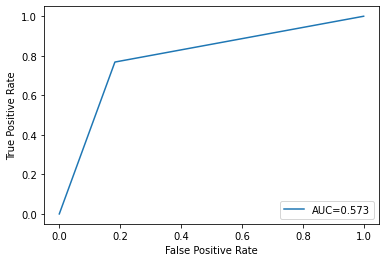

Area under ROC matplotlib weighted = 0.793


decision tree
Pyspark
Area under ROC = 0.746
Matplotlib


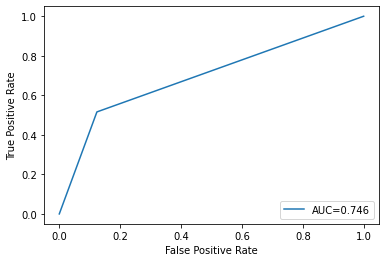

Area under ROC matplotlib weighted = 0.696


logistic regression
Pyspark
Area under ROC = 0.989
Matplotlib


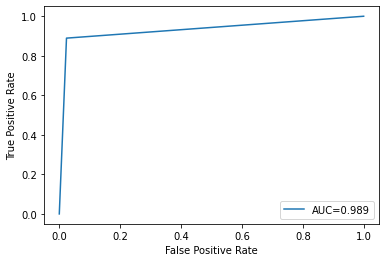

Area under ROC matplotlib weighted = 0.933


random forest
Pyspark
Area under ROC = 0.785
Matplotlib


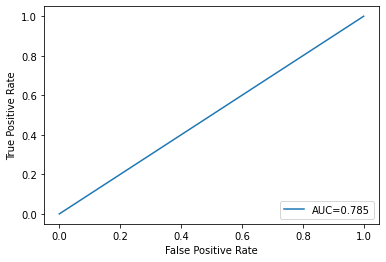

Area under ROC matplotlib weighted = 0.500


Gradient Boosted tree
Pyspark
Area under ROC = 0.842
Matplotlib


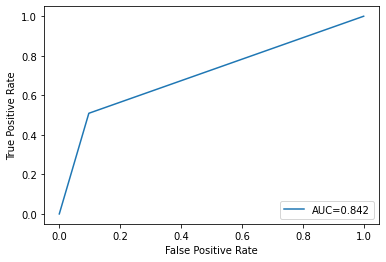

Area under ROC matplotlib weighted = 0.706




In [0]:
#Q2e
from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

def display_roc_curve(prediction):
    #evaluate model
    evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel",metricName="areaUnderROC")
    auc = evaluator.evaluate(prediction)
    
    y_pred = prediction.select("prediction").toPandas().values
    y_true = prediction.select("indexedLabel").toPandas().values
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    
    print("Pyspark")
    print(f"Area under ROC = {auc:.3f}")
    
    print("Matplotlib")
    plt.plot(fpr,tpr, label=f"AUC={auc:.3f}")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    print(f"Area under ROC matplotlib weighted = {roc_auc_score(y_true,y_pred,average='weighted'):.3f}\n\n")


#train test split (80%)
(trainingData, testingData) = dataset.randomSplit([0.8,0.2], 0)

#create models
nb = NaiveBayes(smoothing=1.0, modelType="multinomial", labelCol="indexedLabel")
dt= DecisionTreeClassifier(labelCol="indexedLabel")
lr= LogisticRegression(labelCol="indexedLabel")
rf = RandomForestClassifier(labelCol="indexedLabel",numTrees=10)
bgt = GBTClassifier(labelCol="indexedLabel",maxIter=10)
models = {"naive bayes":nb,"decision tree":dt,"logistic regression":lr,"random forest":rf,"Gradient Boosted tree":bgt}

#train models
for model in models.keys():
    print(model)
    m = models[model].fit(trainingData)
    prediction = m.transform(testingData)
    display_roc_curve(prediction)
    
    

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

import matplotlib.pyplot as plt

# Create a Pipeline estimator and fit on train DF, predict on test DF
estimator = models["naive bayes"]
model = estimator.fit(trainingData)
predictions = model.transform(testingData)

# Returns as a list (false positive rate, true positive rate)
preds = predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['prediction'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
<command-528443146688719> in <cell line: 32>()
     30 # Returns as a list (false positive rate, true positive rate)
     31 preds = predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['prediction'])))
---> 32 points = CurveMetrics(preds).get_curve('roc')
     33 
     34 plt.figure()

<command-528443146688719> in __init__(self, *args)
      3 class CurveMetrics(BinaryClassificationMetrics):
      4     def __init__(self, *args):
----> 5         super(CurveMetrics, self).__init__(*args)
      6 
      7     def _to_list(self, rdd):

/databricks/spark/python/pyspark/mllib/evaluation.py in __init__(self, scoreAndLabels)
     71         sc = scoreAndLabels.ctx
     72         sql_ctx = SQLContext.getOrCreate(sc)
---> 73         numCol = len(scoreAndLabels.first())
     74         schema = 

In [0]:
"""
#DropNa (another approach)
from pyspark.sql.functions import isnan, when, count, col

for index,df in enumerate(dataframes):
    #check for null values for each column
    print(f"Count of null values in dataframe {index}")
    df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns]).show(vertical=True)

    print(f"Count of missing values in dataframe {index}")
    df.select([count(when(isnan(c),c)).alias(c) for c in df.columns]).show(vertical=True)
    
    df_clean = df.dropna()
    df_clean=df.filter(df.OnlineSecurity!="NAN" & df.OnlineBackup!="NAN" & df.DeviceProtection!="NAN" & df.TechSupport!="NAN" & df.StreamingTV!="NAN" & df.StreamingMovies!="NAN")
"""

Out[18]: '\n#DropNa (another approach)\nfrom pyspark.sql.functions import isnan, when, count, col\n\nfor index,df in enumerate(dataframes):\n    #check for null values for each column\n    print(f"Count of null values in dataframe {index}")\n    df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns]).show(vertical=True)\n\n    print(f"Count of missing values in dataframe {index}")\n    df.select([count(when(isnan(c),c)).alias(c) for c in df.columns]).show(vertical=True)\n    \n    df_clean = df.dropna()\n    df_clean=df.filter(df.OnlineSecurity!="NAN" & df.OnlineBackup!="NAN" & df.DeviceProtection!="NAN" & df.TechSupport!="NAN" & df.StreamingTV!="NAN" & df.StreamingMovies!="NAN")\n'

In [0]:
"""
#import avg and sum function 
from pyspark.sql.functions import avg, sum

print("Tenure")
#calculate the average of "Phone Service "
for df in dataframes:
    df.select(avg("Tenure")).display()

print("TotalCharges")
for df in dataframes:
    df.select(sum("TotalCharges")).display()
"""

Out[19]: '\n#import avg and sum function \nfrom pyspark.sql.functions import avg, sum\n\nprint("Tenure")\n#calculate the average of "Phone Service "\nfor df in dataframes:\n    df.select(avg("Tenure")).display()\n\nprint("TotalCharges")\nfor df in dataframes:\n    df.select(sum("TotalCharges")).display()\n'

In [0]:
#Selection important attributes that is useful for further analysis in PySpark dataframe for dataset
"""
for df in dataframes:
    df_selected=df.select("customerID","gender", "SeniorCitizen","Tenure","PhoneService","MultipleLines","InternetService","Contract","MonthlyCharges","TotalCharges","Churn")
    df_selected.describe().display()
    
    #Maximum grouped by PhoneService and InternetService Column
    df_selected.select('*').groupBy('PhoneService').max().orderBy('PhoneService').display()
    df_selected.select('*').groupBy('InternetService').max().orderBy('InternetService').display()
"""

Out[20]: '\nfor df in dataframes:\n    df_selected=df.select("customerID","gender", "SeniorCitizen","Tenure","PhoneService","MultipleLines","InternetService","Contract","MonthlyCharges","TotalCharges","Churn")\n    df_selected.describe().display()\n    \n    #Maximum grouped by PhoneService and InternetService Column\n    df_selected.select(\'*\').groupBy(\'PhoneService\').max().orderBy(\'PhoneService\').display()\n    df_selected.select(\'*\').groupBy(\'InternetService\').max().orderBy(\'InternetService\').display()\n'